# TO DO 

- Classification
    - Bayesian network 
    - SVM 
        - tunjukkan algoritma (dalam bentuk pseudocode) 
    - hiearchical agglomerative methods (buat dendongram) 
- Sequence Pattern 
    - prefix span, menggunakan data belanja
- Density base clustering 
    - k-means
- Probabilistic Model Clustering
    - gaussian mixture models (extension dari kmeans)
        - [in depth gmm](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html)

## KMeans

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import numpy as np 

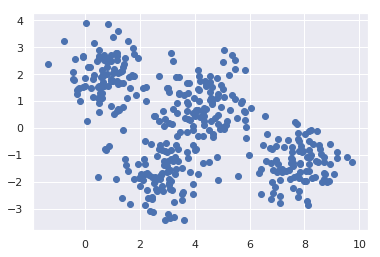

In [2]:
#dataset generator

from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples = 400, 
                      centers = 4, 
                      cluster_std=0.8, 
                      random_state=0)
X = X[:, ::-1]
type(X)
plt.scatter(X[:,0],X[:,1])

[1 2 2 1 2 0 3 1 2 3 0 3 1 2 2 3 2 3 1 2 2 2 0 1 1 0 0 1 1 3 1 1 2 1 2 0 3
 1 3 1 2 0 3 1 3 0 3 3 3 0 0 0 2 0 0 2 1 3 3 2 3 3 3 3 1 2 3 1 1 0 2 1 2 0
 3 2 1 2 0 2 2 1 3 0 1 2 2 1 2 3 2 3 1 2 2 0 1 3 3 3 0 3 1 1 2 0 1 0 3 2 2
 2 1 2 0 3 0 2 0 0 1 1 3 0 1 0 3 3 3 1 0 0 0 2 1 2 0 1 0 2 1 2 2 0 2 3 1 2
 3 2 3 1 3 1 0 2 3 2 2 2 1 2 0 2 2 0 3 3 2 0 0 0 0 3 3 3 1 2 1 0 1 0 2 1 0
 2 0 1 1 0 1 1 0 2 0 0 0 3 3 1 1 2 3 3 0 1 2 0 1 0 1 1 3 3 0 3 1 0 3 0 2 1
 0 2 1 2 3 0 1 0 1 2 1 1 0 3 1 3 1 2 3 1 1 0 3 1 0 1 3 2 2 3 2 1 0 0 1 1 3
 0 1 2 2 2 0 1 1 1 1 1 3 1 1 0 2 3 0 3 3 3 0 3 3 0 0 0 3 1 3 1 3 2 1 3 2 1
 3 3 1 2 0 0 1 0 3 3 1 0 0 3 3 1 0 1 3 1 3 0 2 2 3 2 1 2 2 0 2 0 3 2 0 3 0
 1 2 1 2 3 1 3 0 3 3 3 3 0 3 2 3 2 3 1 0 1 3 3 1 2 2 0 0 0 2 1 3 1 2 3 2 0
 2 1 1 2 0 1 0 0 2 0 2 0 1 1 1 1 0 0 0 0 2 0 1 3 3 1 1 3 1 3]
array([[ 6.03920270e+00,  7.49504539e-01],
       [ 2.38996888e+00, -3.08834729e+00],
       [ 3.11906979e+00, -3.35780005e+00],
       [ 4.31777065e+00,  6.11844076e-01],
       [ 2.20670

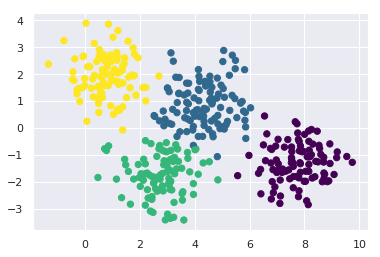

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
print(labels)
from pprint import pprint 
pprint(X)
plt.scatter(X[:,0],X[:,1], c= labels, s=40, cmap='viridis')

In [4]:
#define kmeans visualization 
from scipy.spatial.distance import cdist
def plot_kmeans(kmeans, X, n_cluster=4, rseed=0, ax=None):
    labels=kmeans.fit_predict(X)
    
    #plot input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:,0],X[:,1],c=labels, s=40, cmap='viridis',zorder=2)
    
    #plot representation of kmeans model 
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels==i],[center]).max()
            for i, center in enumerate(centers)]
    for c,r in zip(centers,radii):
        ax.add_patch(plt.Circle(c,r,fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        

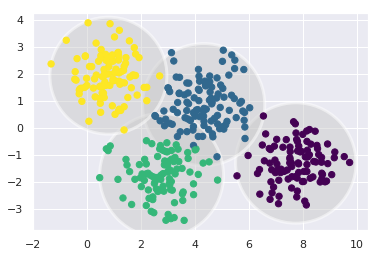

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans,X)
#kmeans always circular, or oblong.

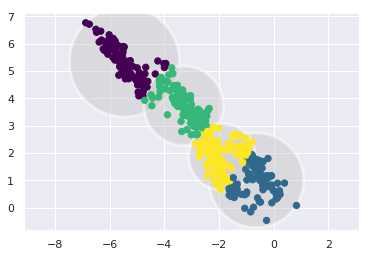

In [6]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X,rng.randn(2,2))
kmeans = KMeans(n_clusters = 4, random_state = 0)
plot_kmeans(kmeans, X_stretched)
#non circular set, transformed to circular 

# Gaussian Mixture Model 
## gmm merupakan *density estimator*
mirip dengan k-means, dengan menggunakan pendekatan expectation-maximization
1. ambil random untuk lokasi centroid dan bentuk 
2. repeat sampai konvergen 
    - *e-step*: tiap point, temukan "encoding weight" dengan kemungkinan titik di tiap cluster
    - *m-step*: tiap centroid, update lokasi, normalisasi dan bentuk dari seluruh data point, untuk membuat weight

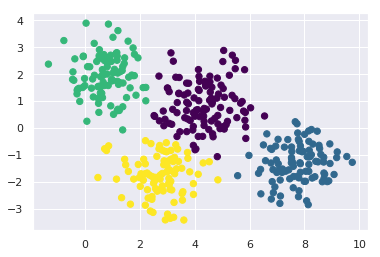

In [7]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

*gmm contains probablistic models* jadi bisa menunjukkan probabilistic cluster dengan menggunakan `predict_proba` yang return matrix `[n_samples, n_clusters]`

In [8]:
probs = gmm.predict_proba(X)
print(probs.round(3))

[[0.996 0.004 0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 ...
 [0.    0.    1.    0.   ]
 [0.947 0.    0.013 0.04 ]
 [0.    0.    1.    0.   ]]


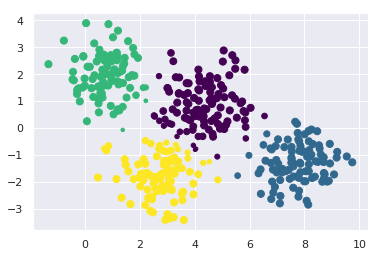

In [9]:
size = 50 * probs.max(1)**2 #dikuadratkan biar perbedaanya terlihat
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size)
# print(size)

In [10]:
#visualisasi 
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs): 
    ax = ax or plt.gca()
    
    #convert konvarians ke axis
    if covariance.shape == (2,2):
        U, s, Vt= np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0],U[0,0]))
        width, height = 2*np.sqrt(s)
    else: 
        angle=0
        width,height=2*np.sqrt(covariance)
    for nsig in range(1,4):
        ax.add_patch(Ellipse(position, nsig*width, nsig*height, angle, **kwargs))

In [11]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels=gmm.fit(X).predict(X)
    if label: 
        ax.scatter(X[:, 0],X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else: 
        ax.scatater(X[:,0],X[:, 1], s=40, cmap='viridis', zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for position, covariance, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(position, covariance, alpha=w*w_factor)

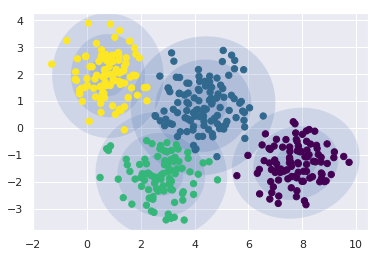

In [12]:
gmm = GaussianMixture(n_components = 4, covariance_type='full', random_state=0)
plot_gmm(gmm,X)

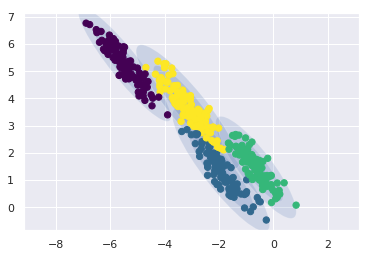

In [13]:
gmm2 = GaussianMixture(n_components = 4, random_state=0)
plot_gmm(gmm2,X_stretched)

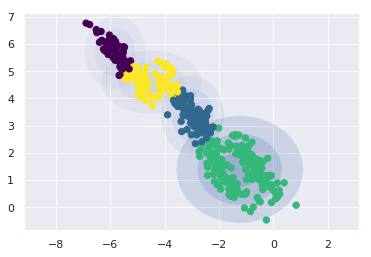

In [14]:
gmm = GaussianMixture(n_components = 4, covariance_type='diag', random_state=0)
plot_gmm(gmm,X_stretched)

## check optimal components
akaike information criterion, bayesian information criterion

In [15]:
n_components = np.arange(1,21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
         for n in n_components]

Text(0.5, 0, 'n_components')

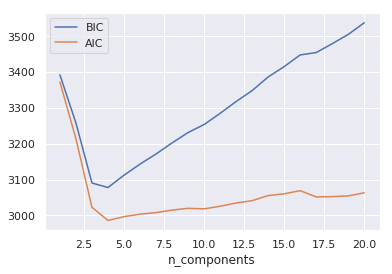

In [16]:
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

berarti
AIC = 3-5
BIC = 3-5

# Bayesian Network Classification 

# SVM 

In [17]:
y = labels
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.4)

In [20]:

# X_train = sc.fit_transform(X_train)
X_train
from sklearn.svm import SVC, LinearSVC
c=20
models = (SVC(kernel='linear', C=c),
          LinearSVC(C=c),
          SVC(kernel='rbf',gamma=0.7, C=c),
          SVC(kernel='poly', degree=6,C=c)
         )
models = (classifier.fit(X_train, Y_train) for classifier in models)
judul = ('SVC with linear kernel',
        'Linear SVC with linear kernel',
        'SVC with rbf kernel',
        'SVC with polynomial 3rd degree kernel')

svc = SVC(kernel='rbf',C=1, gamma=1)
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
from sklearn.metrics import accuracy_score 
accuracy_score(Y_test,y_pred)

0.99375

NameError: name 'clf' is not defined

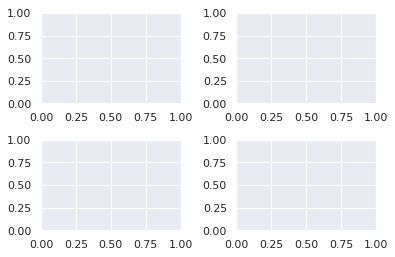

In [21]:
def make_meshgrid(x,y,h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=.4, hspace=.4)

X0, X1 = X[:,0],X[:,1]
xx,yy = make_meshgrid(X0,X1)
for classifier, title, ax in zip(models, judul, sub.flatten()):
    plot_contours(ax,classifier,xx,yy,cmap=plt.cm.coolwarm,alpha=0.8)
    ax.scatter(X0,X1,c=y, cmap='viridis',s=10,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()
